### Lab-3 : Self-Practice

#### In this week, your self-practice task will consist to analyze the impact of class imballance on the performance of the logistic regression model.

#### Class imbalance is very common in real life. For example, in a classification problem to predict whether a person has a certain very rare disease, the dataset will always contain more negative samples than positive ones. This situation can have a significant impact on the performance of the model. You will analyze this situation in the case of the Titanic dataset used in the lab.

### 1. Load the titanic dataset and <b>PLOT</b> the proportion of positive and negative samples (survived vs non survived)

<BarContainer object of 2 artists>

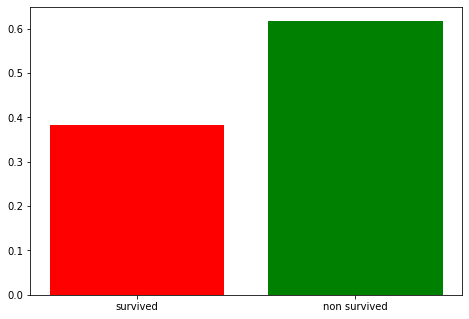

In [432]:
### write your code here. Load the dataset and plot (barplot) proportion of each class 
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('titanic.csv')
data.drop('name',axis=1,inplace=True)
survived = len(data[data['survived']==1]) / len(data)
non_survived = len(data[data['survived']==0]) / len(data)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['survived','non survived']
ax.bar(langs, [survived, non_survived], color=['r','g'])

#### Preprocess the data as it has been done in the lab, feel free to adapt

In [433]:
#### preprocess the data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# imputing missing values
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(data)
data = pd.DataFrame(imputer.transform(data), columns=data.columns)

# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
    new_df = pd.concat([df, new_cols], axis=1)    
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(sparse=False, drop='first')
f_names = ['sex', 'embarked']
encoder.fit(data[f_names])
data = ohe_new_features(data, f_names, encoder)

# feature scaling
scaler = MinMaxScaler()
scaler.fit(data)
data = pd.DataFrame(scaler.transform(data), columns=data.columns)
data


,survived,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1.0,0.0,0.361142,0.000,0.000000,0.412503,0.0,0.0,1.0
1,1.0,0.0,0.009395,0.125,0.222222,0.295806,1.0,0.0,1.0
2,0.0,0.0,0.022924,0.125,0.222222,0.295806,0.0,0.0,1.0
3,0.0,0.0,0.373669,0.125,0.222222,0.295806,1.0,0.0,1.0
4,0.0,0.0,0.311036,0.125,0.222222,0.295806,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1304,0.0,1.0,0.179506,0.125,0.000000,0.028213,0.0,0.0,0.0
1305,0.0,1.0,0.298509,0.125,0.000000,0.028213,0.0,0.0,0.0
1306,0.0,1.0,0.329826,0.000,0.000000,0.014102,1.0,0.0,0.0
1307,0.0,1.0,0.336089,0.000,0.000000,0.014102,1.0,0.0,0.0


## 2. Impact of class imballance. 
##### Now, you will `artificially` imbalance the dataset. From the original dataset, create different dataset with the following class representations (drop samples from one class): 
##### 1. 20% vs 80%
##### 2. 30% vs 70%
##### 3. 40% vs 60%

## Split each data into train and test set as in the lab; train logistic regression model for each setting and report (PLOT) the accuracy, precision, and recall of each model

202
809
346
809
500
750


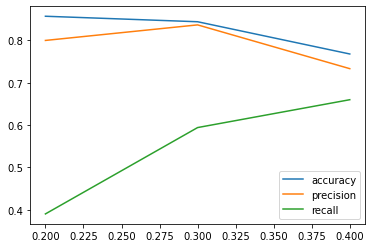

In [434]:
### write your code here 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

def target_percent(data_set, percent):
    survived = data_set[data_set['survived']==1]
    non_survived = data_set[data_set['survived']==0]

    if ( len(survived) / len(data_set) ) >= percent:
        drop = int((len(non_survived) * percent) / (1-percent))
        survived = survived.sample(n=drop)
    elif ( len(survived) / len(data_set) ) < percent :
        drop = int((len(survived) * (1-percent)) / percent)
        non_survived = non_survived.sample(n=drop)
    res = pd.concat([survived, non_survived],axis=0)
    print(res[res['survived']==1]['survived'].count())
    print(res[res['survived']==0]['survived'].count())
    return res

def train(data_set):
    x_train, x_test, y_train, y_test = train_test_split(data_set.loc[:, 'pclass':], data_set['survived'],
                                                    test_size=0.2, stratify=data_set['survived'])
    clf = LogisticRegression(random_state=0).fit(x_train, y_train)
    y_test_pred = clf.predict(x_test)
    return y_test, y_test_pred


percents = [0.2, 0.3, 0.4]
ys_test = []
ys_predicted = []
accuracys = []
precisions = []
recalls = []
targets = [target_percent(data, i) for i in percents]

for target in targets:
    y_test, y_pred = train(target)
    ys_test.append(pd.DataFrame(y_test))
    ys_predicted.append(pd.DataFrame(y_pred, columns=["survived"], index=y_test.index))
    accuracy, precision, recall = (metrics.accuracy_score(y_true=y_test, y_pred=y_pred), 
                                     metrics.precision_score(y_true=y_test, y_pred=y_pred),
                                        metrics.recall_score(y_true=y_test, y_pred=y_pred))
    accuracys.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

plt.plot(percents, accuracys, label="accuracy")
plt.plot(percents, precisions, label="precision")
plt.plot(percents, recalls, label="recall")
plt.legend()
plt.show()


## 3. Analyse the class-wise accuracy. 
#### For each model, plot (bar plots) the class-wise accuracy, i.e., the accuracy for each class.

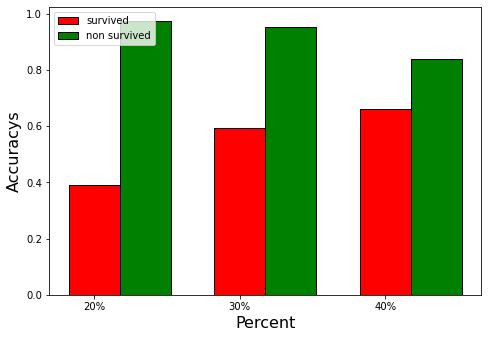

In [435]:
#### write your code 
import numpy as np

survived_accuracy = []
non_survived_accuracy = []

for y_test, y_pred in zip(ys_test, ys_predicted):
    survived_index = y_test['survived'] == 1
    non_survived_index = y_test['survived'] == 0
    survived_accuracy.append(metrics.accuracy_score(y_test[survived_index], y_pred[survived_index]))
    non_survived_accuracy.append(metrics.accuracy_score(y_test[non_survived_index], y_pred[non_survived_index]))

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
percent = ['20%', '30%', '40%']
accuracys_label = ['survived', 'non survived']
bar_width = 0.35


plt.bar(X,survived_accuracy,bar_width,color='red',edgecolor='black')
plt.bar(X+bar_width,non_survived_accuracy,bar_width,color='green',edgecolor='black')
plt.xticks(X, percent)
plt.xlabel('Percent', fontsize=16)
plt.ylabel('Accuracys', fontsize=16)
plt.legend(accuracys_label,loc=2)
plt.show()

## 4. Report 
### Write a small report (few sentences) to discuss from your analysis, the impact of class imballance on logistic model's performance 

In this example we can say that the accuracy of the class prediction decreases as the proportion increases because it is harder to guess that the person will die. In addition, we can see that the model recall increases, which means that it is easier for the model to recognize a survivor depending on the proportion.